# Electric Bike Exercise

This document contains my solution for electric bike exercise, which will continue between all rounds of exercises. This is one of the exercises from the Statical Data Analysis course at the University of Turku.

#### Import all needed packages

In [264]:
# Import all needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1.5 Electric bikes

This exercise begins a series of exercises that spans throughout the course. The same data is analysed from
various perspectives in order to illustrate how a statistical analysis project can proceed. The exercises concern a
hypothetical scenario, but the data is derived from real-world data.

The file bikes.data contains data that was collected from the recording devices of commercial electric bikes.
You can assume that no preprocessing or filtering has been done. The data may therefore contain irrelevant
records, such as customers only trying out how bikes can be rented with an Android app and cancelling the
transaction without actually riding the bike. You can also assume that there have been quite a few technical
problems with the bikes, which may have resulted in invalid values in the data.

• Load the data from the file bikes.data.

• Can you find any irrelevant records or invalid values? If you do, explain why the records are irrelevant or
the values invalid.

• Process the irrelevant records and invalid values you found. Explain why the modifications you made are
the correct way to fix the problems in the data.

(NOTE: At this stage of the course, it might be challenging to effectively explore the data, so it okay if you do
not find anything interesting. We will return to this task in a later exercise when studying descriptive statistics.)


___

## Solution 1.5

### Load the data bikes.data

In [265]:
# Load the data
bikes_data = pd.read_csv("data/bikes/bikes.data")

# Print the data
bikes_data

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1770,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0
1772,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


#### Can you find any irrelevant records or invalid values? If you do, explain why the records are irrelevant or the values invalid.

In [266]:
# Check certainly invalid values.
print((bikes_data.duration < 0).value_counts())
print((bikes_data.distance < 0).value_counts())
print(((bikes_data.assistance == 0) & (bikes_data.energy_used > 0)).value_counts())


# Check possibly invalid values.
# The average speed of the electric bike should not exceed 25 km/h, because the electric assist usually stops at 25 km/h.
# Then calculate the average speed of the bikes, where about 7 m/s is 25 km/h.
print((bikes_data.distance / bikes_data.duration > 7).value_counts())

duration
False    1774
Name: count, dtype: int64
distance
False    1735
True       39
Name: count, dtype: int64
False    1770
True        4
Name: count, dtype: int64
False    1768
True        6
Name: count, dtype: int64


#### Process the irrelevant records and invalid values you found. Explain why the modifications you made are the correct way to fix the problems in the data.

In [267]:
# Replace invalid values
bikes_data.loc[bikes_data.duration < 0, 'duration'] = np.nan
bikes_data.loc[bikes_data.distance < 0, 'distance'] = np.nan
bikes_data.loc[(bikes_data.assistance == 0) & (bikes_data.energy_used > 0), 'assistance'] = 1

# 2.5 Electric bikes

Continue to analyse the data you handled in the earlier exercise. The descriptions of the variables are given
below.

• What types are the variables? (Consider as many categorisations as possible.)

• Check that the data types and values in the data you have loaded match the variable types. Fix if needed.

___

## Solution 2.5

#### What types are the variables? (Consider as many categorisations as possible.)

Tickets - **Nominal** [Categorical]

Cost - **Ratio** [Numerical]

Month - **Nominal** [Categorical]

Location_from - **Nominal** [Categorical]

Location_to - **Nominal** [Categorical]

Duration - **Ratio** [Numerical]

Distance - **Ratio** [Numerical]

Assistance - **Indicator** [Binary]

Energy_used - **Ratio** [Numerical]

Energy_collected - **Ratio** [Numerical]

#### Check that the data types and values in the data you have loaded match the variable types. Fix if needed.

In [268]:
#Change the datatype of the ticket from object datatype to categorical datatype.
bikes_data.ticket = pd.Categorical(bikes_data.ticket)

#Change the datatype of the month from object datatype to categorical datatype.
bikes_data.month = pd.Categorical(bikes_data.month).rename_categories({4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October'})

# Change the datatype of the location_from and location_to from object datatype to categorical datatype.
bikes_data.location_from = pd.Categorical(bikes_data.location_from)
bikes_data.location_to = pd.Categorical(bikes_data.location_to)

# Change the assistance datatype from integer to categorical datatype.
bikes_data.assistance = pd.Categorical(bikes_data.assistance).rename_categories({0: 'Disabled', 1: 'Enabled'})


# Print the infotable of the dataframe
bikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1774 entries, 0 to 1773
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   ticket            1774 non-null   category
 1   cost              1774 non-null   float64 
 2   month             1774 non-null   category
 3   location_from     1774 non-null   category
 4   location_to       1774 non-null   category
 5   duration          1774 non-null   float64 
 6   distance          1735 non-null   float64 
 7   assistance        1774 non-null   category
 8   energy_used       1774 non-null   float64 
 9   energy_collected  1774 non-null   float64 
dtypes: category(5), float64(5)
memory usage: 79.4 KB


# 3.4 Electric bikes

Continue to analyse the electric bike data from the earlier exercises.

• Create both visualisations and numerical summaries to explore the data.

• Make comments about the data. Is there anything odd or interesting in the data?

• Process irrelevant records and invalid values like previously.

___

## Solution 3.4

#### Create both visualisations and numerical summaries to explore the data.

In [269]:
categorical = ['ticket', 'month', 'location_from', 'location_to', 'assistance']

quantitative = ['cost', 'duration', 'distance']

for column in categorical:
    print(column)
    print(bikes_data[column].value_counts().sort_index())

ticket
ticket
savonia    254
season     553
single     967
Name: count, dtype: int64
month
month
April         38
May          298
June         355
July         355
August       214
September    277
October      237
Name: count, dtype: int64
location_from
location_from
KAUPPAKATU        237
KEILANKANTA       153
KYS                94
MICROTEKNIA       182
NEULAMÄKI         157
PIRTTI             28
PUIJONLAAKSO      161
SATAMA            200
TASAVALLANKATU    144
TORI              418
Name: count, dtype: int64
location_to
location_to
KAUPPAKATU        287
KEILANKANTA       142
KYS                75
MICROTEKNIA       176
NEULAMÄKI         155
PIRTTI             30
PUIJONLAAKSO      190
SATAMA            163
TASAVALLANKATU    156
TORI              400
Name: count, dtype: int64
assistance
assistance
Disabled     145
Enabled     1629
Name: count, dtype: int64


,cost,duration,distance
count,1774.000000,1774.000000,1735.000000
mean,0.491234,671.323563,2522.847262
std,4.127344,1141.708627,2338.679540
min,0.000000,2.000000,0.000000
25%,0.000000,245.250000,930.000000
50%,0.050000,546.500000,2050.000000
75%,0.550000,877.750000,3670.000000
max,100.000000,25614.000000,20770.000000


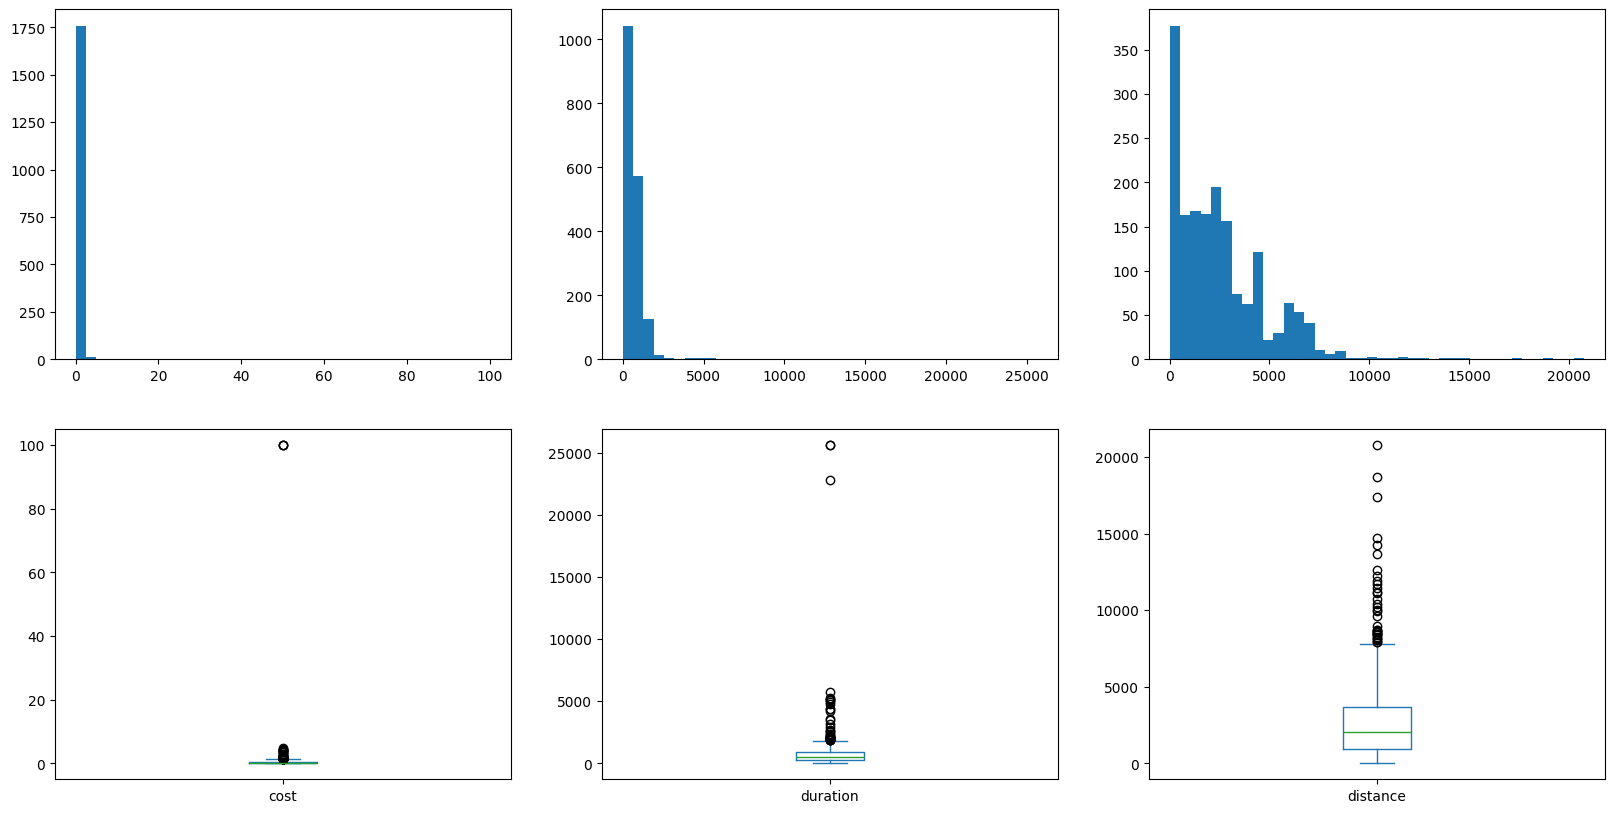

In [270]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for i, column in enumerate(quantitative):
    bikes_data[column].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    bikes_data.plot.box(column=column, ax=axes[1, i])

bikes_data[quantitative].describe()

,cost,duration,distance
count,1771.000000,1771.000000,1732.000000
mean,0.322671,630.664596,2516.068129
std,0.502366,569.732062,2322.343674
min,0.000000,2.000000,0.000000
25%,0.000000,245.000000,930.000000
50%,0.050000,546.000000,2050.000000
75%,0.550000,876.000000,3670.000000
max,4.800000,5722.000000,20770.000000


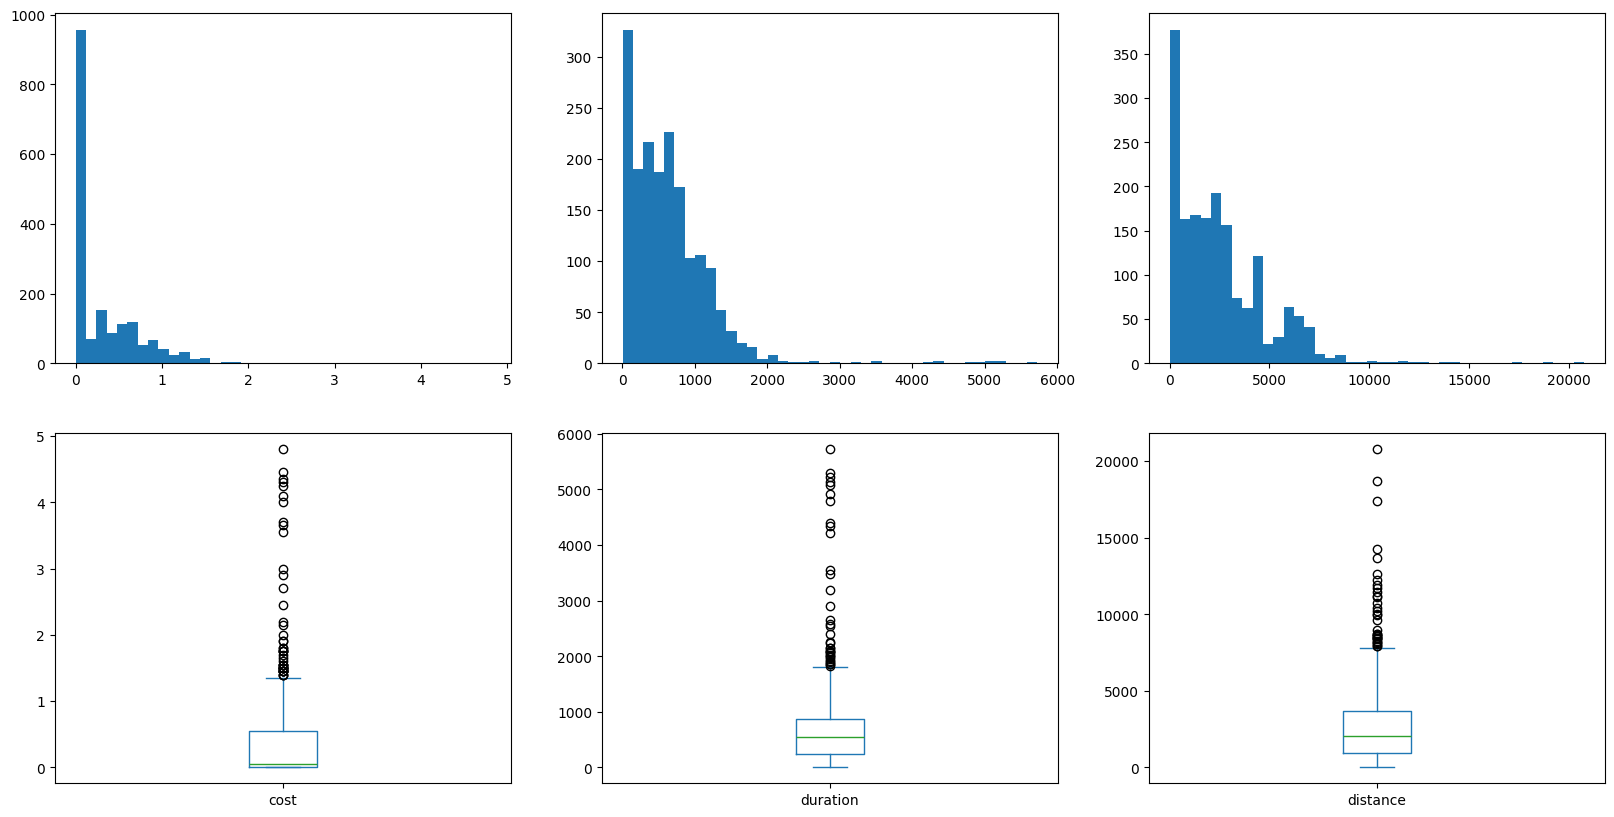

In [271]:
# Remove the outliers
bikes_data = bikes_data[bikes_data.duration < 10000]
bikes_data = bikes_data[bikes_data.cost < 100]

# Repeat the plotting process
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for i, column in enumerate(quantitative):
    bikes_data[column].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    bikes_data.plot.box(column=column, ax=axes[1, i])

bikes_data[quantitative].describe()

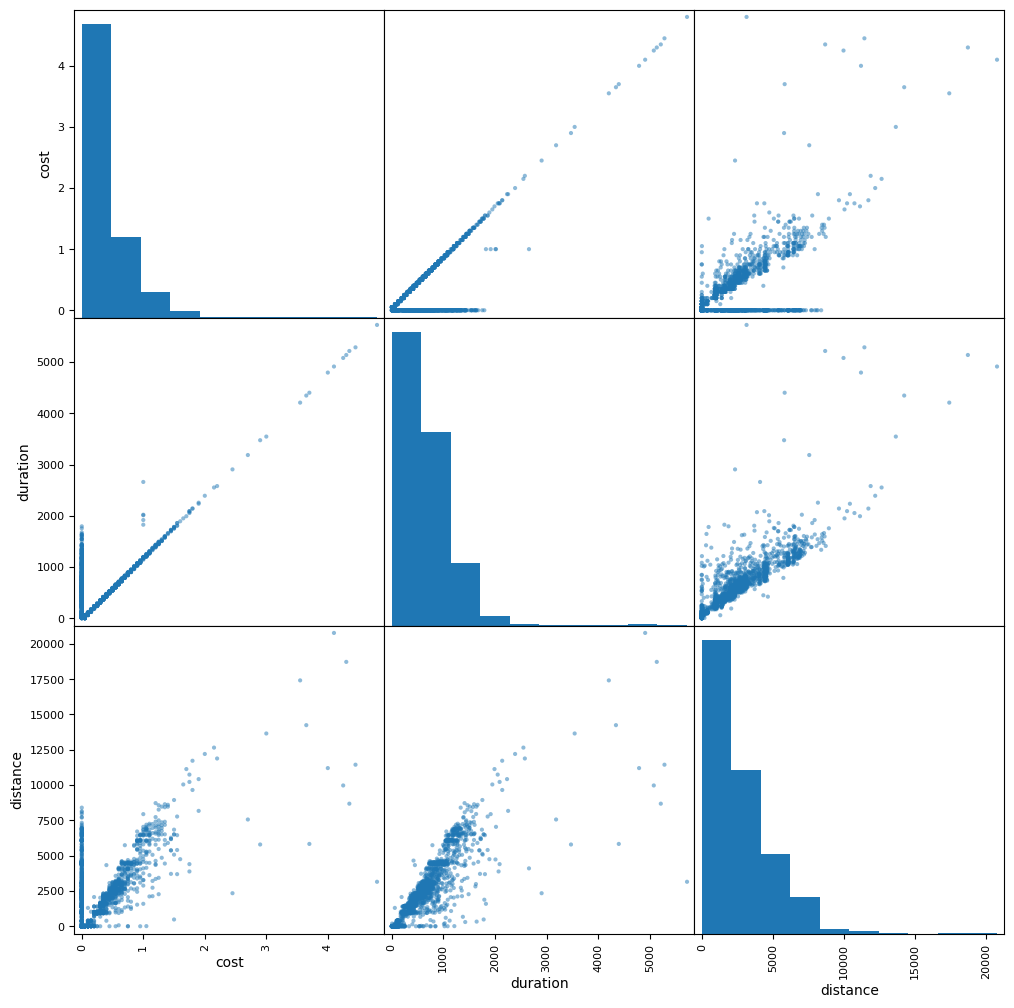

In [272]:
# Explore pair-wise relationships
pd.plotting.scatter_matrix(bikes_data[quantitative], figsize=(12, 12))
plt.show()

,cost,duration,distance
count,1490.000000,1490.000000,1456.000000
mean,0.374060,733.547651,2992.424451
std,0.530462,561.108194,2234.128064
min,0.000000,61.000000,10.000000
25%,0.000000,374.250000,1410.000000
50%,0.200000,628.500000,2455.000000
75%,0.600000,962.000000,4340.000000
max,4.800000,5722.000000,20770.000000


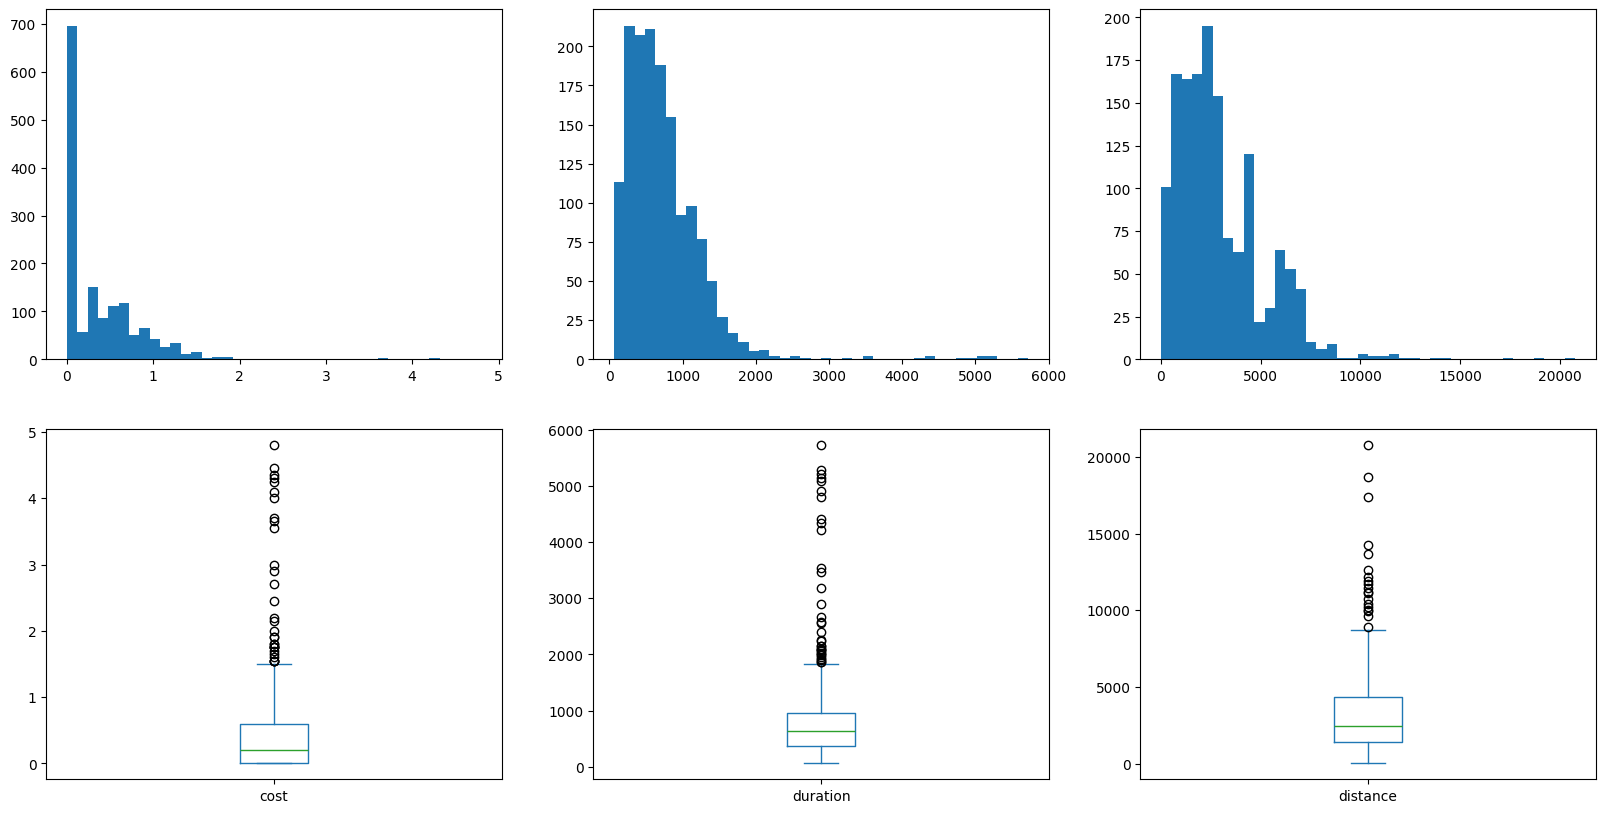

In [273]:
# Remove rides that ae lively just tests

bikes_data = bikes_data[bikes_data.duration >= 60]
bikes_data = bikes_data[bikes_data.distance != 0]

# Repeat the plotting process

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 10))
for i, column in enumerate(quantitative):
    bikes_data[column].hist(bins=40, ax=axes[0, i])
    axes[0, i].grid(False)
    bikes_data.plot.box(column=column, ax=axes[1, i])

bikes_data[quantitative].describe()


# 3.5 Electric bikes

Continue to analyse the electric bike data from the earlier exercises.

• For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

• For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time.

• For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips.
___

### Solution 3.5

#### For each ticket type, calculate the number of trips made, the total distance travelled, the total time travelled and the total amount of fees paid. Examine your results and make comments about the customers.

In [274]:
# Calulate the number of trips made
infotable = bikes_data.groupby('ticket', observed=None)[['duration', 'distance', 'cost']].sum()
infotable['trips'] = bikes_data.ticket.value_counts()
infotable

,duration,distance,cost,trips
ticket,,,,
savonia,138370.0,494380.0,2.00,218
season,317094.0,1311290.0,3.00,457
single,637522.0,2551300.0,552.35,815


We can see that the single ticket has been used the most. Total paid fees for student and season ticket are really low, because they should be free for their users. For some reason there are costs, which tells that there have been some technical problems, wrong data, or something else.

#### For each ticket type, visualise the monthly rental activity in terms of the total distance travelled. Examine your results and make comments about the development of the rental activity over time.

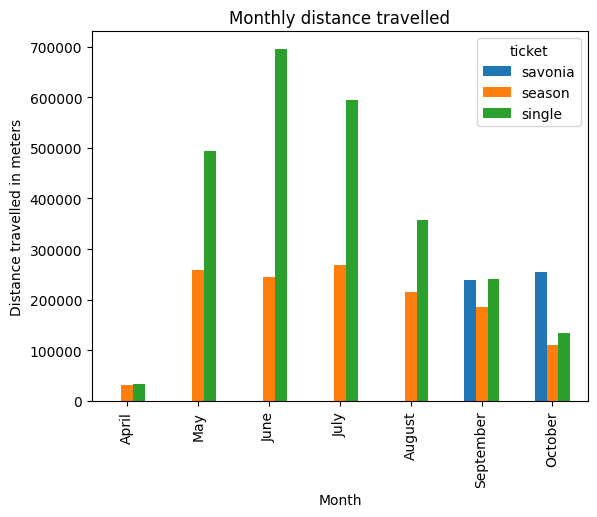

In [275]:
# Visualize the monthly rental activity in terms of the total distance travelled for each ticket types.
monthly_distance = bikes_data.groupby(['month', 'ticket'], observed=None)['distance'].sum().unstack()
monthly_distance.plot(kind='bar')
plt.ylabel('Distance travelled in meters')
plt.xlabel('Month')
plt.title('Monthly distance travelled')
plt.show()

We see that the student ticket is only used in September and October, which indicates that the type of student ticket may be new. There is not much traffic on these electric bikes in April, and summer time is the most common time for their use.

#### For each trip in the data set, calculate its net energy gain, which is defined as the difference between the energy collected and consumed during a trip. Visualise the distribution of this new variable. Make comments about how much battery levels tend to change during trips.

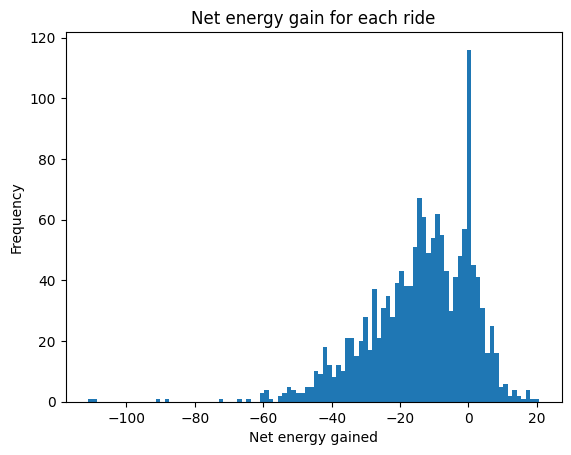

In [276]:
# Calculate the net energy gain for each ride
net_energy_gain = bikes_data.energy_collected - bikes_data.energy_used

# Visualize the net energy gain for each ride
net_energy_gain.plot.hist(bins=100)
plt.xlabel('Net energy gained')
plt.ylabel('Frequency')
plt.title('Net energy gain for each ride')
plt.show()

We see that more energy has been used than collected in most cases. The highest peak seems to be somewhere near zero, which may mean that these bikes can collect about as much energy as they need.